In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

from utils import SMOTE, RUS, decision_plot

In [7]:
dt = pd.read_csv('nonsep_3clusters_no_noise.csv')
X = np.array(dt.loc[:, dt.columns != 'y'])
y = np.array(dt.y)

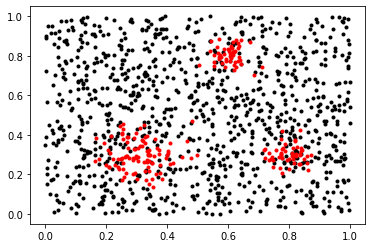

In [8]:
plt.plot(X[y==0,0],X[y==0,1],'.',c='black')
plt.plot(X[y==1,0],X[y==1,1],'.',c='red')
plt.show()

In [9]:
model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

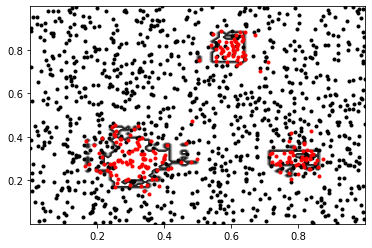

In [10]:
decision_plot(X,y,model)

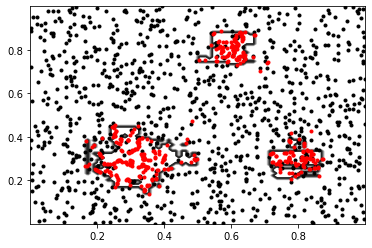

In [11]:
smt = SMOTE(X,y,K=5,dup_size=1)
smt_X = np.vstack((X,smt))
smt_y = np.concatenate((y,np.ones(smt.shape[0])))

model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(smt_X, smt_y)
decision_plot(smt_X,smt_y,model)

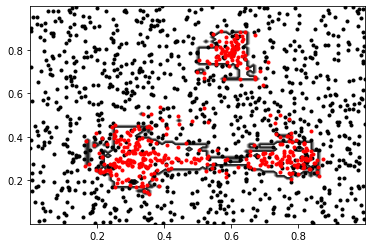

In [12]:
smt = SMOTE(X,y,K=150,dup_size=1)
smt_X = np.vstack((X,smt))
smt_y = np.concatenate((y,np.ones(smt.shape[0])))

model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(smt_X, smt_y)
decision_plot(smt_X,smt_y,model)

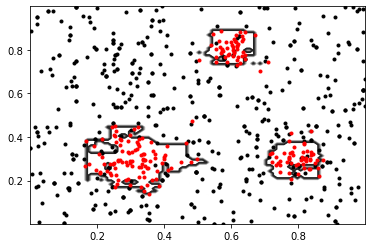

In [14]:
rus_X,rus_y = RUS(X,y,p=0.5)

model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(rus_X, rus_y)
decision_plot(rus_X,rus_y,model)